In [22]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['nonzero']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [31]:
def orthogonal_matching_pursuit(reference, dictionary, tolerance, sparsity=None):
    """
    @brief      Find the minimum set of vectors (big_theta) in the 
                dictionary so that 
                max(abs(reference - numpy.dot(big_theta.T, coeffs))) < tolerance
    
    @param      reference   1D numpy.array of length N that we want to 
                            approximate
    @param      dictionary  list of numpy.array`s of length N representing
                            the "atoms" or "basis"-vectors 
    @param      tolerance   Approximation tolerance
    
    @return     big_lambda, coeffs, big_theta

                big_lambda  list of atom indices representing the sparse
                            solution
                coeffs      coefficients for the sparse solution
                big_theta   atoms of sparse solution

    Usage:
        _, coeffs, big_theta = orthogonal_matching_pursuit(reference, 
                                                           dictionary, 
                                                           tolerance)
        approximation = numpy.dot(big_theta.T, coeffs)
        max(abs(approximation - reference)) < tolerance: True!
    Reference:
        Algorithm straight from 
        Signal Recovery From Random Measurements Via Orthogonal Matching Pursuit
        Joel A. Tropp and Anna C. Gilbert
        IEEE Transactions on Information Theory, Vol. 53, NO. 12, December 2007
    """
    residual = reference.copy()
    big_lambda = []
    big_theta = None 
    rows = []
    for n in range(len(dictionary)):
        index = numpy.argmax([abs(residual.dot(d)) for d in dictionary])
        rows.append(index)
        big_lambda.append(index)
        theta = dictionary[index]
        if big_theta is None:
            big_theta = theta.reshape((1,theta.size))
        else: 
            big_theta = numpy.vstack((big_theta,theta))

        coeffs         = numpy.linalg.lstsq(big_theta.T, reference)[0]
        reconstruction = numpy.dot(big_theta.T,coeffs)
        residual       = reference - reconstruction
        if abs(residual).max() < tolerance:
            break
        if sparsity is not None and n == sparsity:
            break
    if n == len(dictionary)-1:
        print "Did not converge, final residual: ",abs(residual).max()
    return big_lambda, coeffs, big_theta, rows 

In [18]:
import sys
import collections
sys.path.insert(0, "../build")


import numpy as np
import _gols as gols
# import gols
# Problem setup as described in the paper:
n = 64
m = 128
samples = 1000
L = 2
np.random.seed(1)
errors = collections.defaultdict(list)
perfect = collections.defaultdict(list)
for s in xrange(samples):
    variance = 1 / float(n)
    A = np.sqrt(variance) * np.random.randn(n, m)
    for k in xrange(1,30):
        nonzero = np.random.choice(m, size=k, replace=False)
        x = np.zeros(m)
        x[nonzero] = np.random.randn(k)
        y = A.dot(x)
        columns, _ = gols.gols_solve(A.T, y, k, L, False)
        Asparse = np.vstack([A[:,c] for c in columns]).T   
        xsrecon, _, _, _ = np.linalg.lstsq(Asparse, y)
        xrecon = np.zeros_like(x)
        xrecon[columns] = xsrecon[:]
        errors[k].append(((x - xrecon)**2).mean())        
        perfect[k].append(int(np.allclose(x, xrecon)))
mean_errors = []
for k in sorted(errors):
    mean_errors.append(np.mean(errors[k]))

In [23]:
mean_perfect = []
for k in sorted(perfect):
    mean_perfect.append(np.mean(perfect[k]))

In [32]:
# Problem setup as described in the paper:
n = 64
m = 128
samples = 100
L = 2
np.random.seed(1)
errors = collections.defaultdict(list)
perfect = collections.defaultdict(list)
for s in xrange(samples):
    variance = 1 / float(n)
    A = np.sqrt(variance) * np.random.randn(n, m)
    for k in xrange(1,30):
        nonzero = np.random.choice(m, size=k, replace=False)
        x = np.zeros(m)
        x[nonzero] = np.random.randn(k)
        y = A.dot(x)
        _, _, _, rows = orthogonal_matching_pursuit(y, A.T, 0.0, k)
        Asparse = np.vstack([A[:,c] for c in columns]).T   
        xsrecon, _, _, _ = np.linalg.lstsq(Asparse, y)
        xrecon = np.zeros_like(x)
        xrecon[columns] = xsrecon[:]
        errors[k].append(((x - xrecon)**2).mean())        
        perfect[k].append(int(np.allclose(x, xrecon)))
mean_errors = []
for k in sorted(errors):
    mean_errors.append(np.mean(errors[k]))

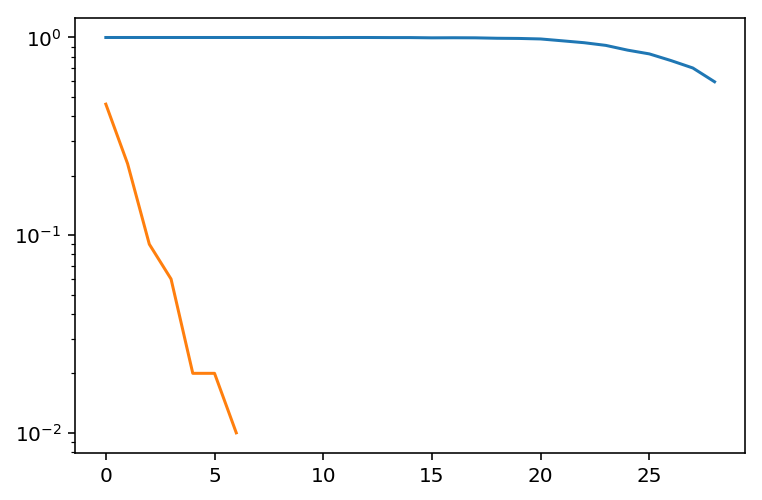

In [35]:
mean_perfect2 = []
for k in sorted(perfect):
    mean_perfect2.append(np.mean(perfect[k]))
semilogy(mean_perfect)
semilogy(mean_perfect2)

In [15]:
for i in range(100):
    assert len(set(np.random.choice(m, 20, replace=False)))==20

In [7]:
import sys
import collections
sys.path.insert(0, "../build")


import numpy as np
import _gols as gols
# import gols
# Problem setup as described in the paper:
n = 64
m = 128
samples = 100
L = 3
np.random.seed(1)
errors = collections.defaultdict(list)
for s in xrange(samples):
    variance = 1 / float(n)
    A = np.sqrt(variance) * np.random.randn(n, m)
    for k in xrange(1,30):
        nonzero = np.random.randint(m, size=k)
        x = np.zeros(m)
        x[nonzero] = np.random.randn(k)
        y = A.dot(x)
        columns, _ = gols.gols_solve(A.T, y, k, L, False)
        Asparse = np.vstack([A[:,c] for c in columns]).T   
        xsrecon, _, _, _ = np.linalg.lstsq(Asparse, y)
        xrecon = np.zeros_like(x)
        xrecon[columns] = xsrecon[:]
        errors[k].append(((x - xrecon)**2).mean())        

mean_errors = []
for k in sorted(errors):
    mean_errors.append(np.mean(errors[k]))

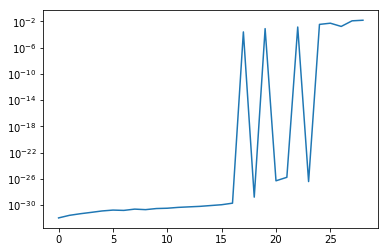

In [8]:
semilogy(mean_errors)